In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

weight = pd.read_csv('weight_data_cleaned.csv')
macros = pd.read_csv('macros_clean.csv')

In [4]:
weight.date = pd.to_datetime(weight.date)
macros.date = pd.to_datetime(macros.date)

In [5]:
weight.describe()

,weight,weight trend,month,day
count,51.000000,51.000000,51.000000,51.000000
mean,64.711765,64.793993,10.843137,15.156863
std,0.329634,0.287178,2.532766,9.150678
min,64.200000,64.427590,1.000000,1.000000
25%,64.400000,64.575900,11.000000,7.500000
50%,64.700000,64.664720,11.000000,14.000000
75%,65.000000,65.109408,12.000000,22.500000
max,65.400000,65.313200,12.000000,31.000000


In [6]:
macros.describe()

,calories,carbs,fat,protein,sodium,sugar
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2229.571429,296.979592,35.551020,156.469388,2188.265306,90.938776
std,189.858829,63.320445,14.143699,16.257181,865.118387,34.982977
min,1837.000000,144.000000,14.000000,106.000000,662.000000,22.000000
25%,2078.000000,246.000000,26.000000,147.000000,1751.000000,62.000000
50%,2241.000000,304.000000,31.000000,154.000000,2198.000000,91.000000
75%,2366.000000,352.000000,46.000000,169.000000,2684.000000,111.000000
max,2752.000000,421.000000,68.000000,187.000000,4310.000000,184.000000


In [20]:

mergedf = pd.merge(weight, macros, on='date')
mergedf.head

mergedf.to_csv(r'weight_cal_data.csv', index = False)


In [8]:
macros.date

0    2020-11-14
1    2020-11-15
2    2020-11-16
3    2020-11-17
4    2020-11-18
5    2020-11-19
6    2020-11-20
7    2020-11-21
8    2020-11-22
9    2020-11-24
10   2020-11-25
11   2020-11-26
12   2020-11-27
13   2020-11-28
14   2020-11-29
15   2020-11-30
16   2020-12-01
17   2020-12-02
18   2020-12-03
19   2020-12-04
20   2020-12-06
21   2020-12-07
22   2020-12-08
23   2020-12-09
24   2020-12-10
25   2020-12-11
26   2020-12-12
27   2020-12-13
28   2020-12-14
29   2020-12-15
30   2020-12-16
31   2020-12-17
32   2020-12-18
33   2020-12-19
34   2020-12-20
35   2020-12-21
36   2020-12-22
37   2020-12-23
38   2020-12-24
39   2020-12-25
40   2020-12-26
41   2020-12-27
42   2020-12-28
43   2020-12-29
44   2020-12-30
45   2021-01-01
46   2021-01-02
47   2021-01-03
48   2021-01-04
Name: date, dtype: datetime64[ns]

In [9]:
xticks =pd.date_range(start='2020-11-01', end='2021-01-11',freq = 'w')
xticks

DatetimeIndex(['2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22',
               '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20',
               '2020-12-27', '2021-01-03', '2021-01-10'],
              dtype='datetime64[ns]', freq='W-SUN')

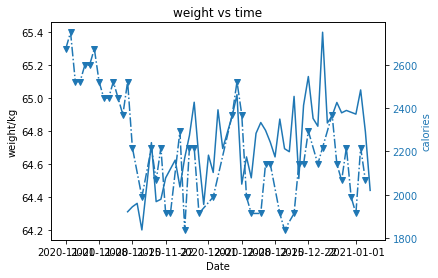

In [10]:
X = weight.date
y = weight.weight

fig, ax1 = plt.subplots()


plt.title('weight vs time', fontdict={'family':'sans serif'})

ax1.plot(X,y, 'v-.')

# ax1.xticks(rotation = 90)

# ax1.set_xticklabels(xticks, rotation = 45, ha="right")

ax1.set_xlabel("Date")

ax1.set_ylabel("weight/kg")

# ax1.set_xticks(xticks, rotation = 90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('calories', color=color)  # we already handled the x-label with ax1
ax2.plot(macros.date, macros.calories, color=color)
ax2.tick_params(axis='y', labelcolor=color)




plt.show()

In [11]:

mergedf = pd.merge(weight, macros, on='date')
mergedf.head()



,date,weight,weight trend,month,day,calories,carbs,fat,protein,sodium,sugar
0,2020-11-14,65.1,65.108765,11,14,1921,202,65,133,1422,53
1,2020-11-15,64.7,65.052180,11,15,1944,239,48,149,755,94
2,2020-11-17,64.4,64.889854,11,17,1837,221,41,147,2486,50
3,2020-11-19,64.7,64.842730,11,19,2241,251,65,157,1912,34
4,2020-11-20,64.5,64.796160,11,20,1968,233,54,144,1161,39


In [12]:
dg = mergedf.groupby(pd.Grouper(key="date", freq="1W")).median()
dg


,weight,weight trend,month,day,calories,carbs,fat,protein,sodium,sugar
date,,,,,,,,,,
2020-11-15,64.90,65.080473,11.0,14.5,1932.5,220.5,56.5,141.0,1088.5,73.5
2020-11-22,64.50,64.796160,11.0,20.0,1979.0,229.0,54.0,148.0,1777.0,49.0
2020-11-29,64.70,64.640396,11.0,27.0,2170.0,245.0,51.0,154.0,1623.0,73.0
2020-12-06,64.65,64.611195,12.0,4.0,2234.5,292.0,24.5,154.5,2377.5,92.0
2020-12-13,64.50,64.692162,12.0,9.5,2236.5,315.0,27.5,156.0,3539.0,85.0
2020-12-20,64.30,64.470120,12.0,17.0,2243.0,349.0,25.0,151.0,2221.0,127.0
2020-12-27,64.70,64.535805,12.0,24.0,2414.0,363.0,29.0,168.0,2684.0,107.0
2021-01-03,64.55,64.582745,6.5,15.5,2384.5,355.5,32.0,174.5,2577.0,100.5


In [13]:
import datetime as dt
X = mergedf.filter(items=['date', 'calories'])
y = mergedf.weight
X['date']=X['date'].map(dt.datetime.toordinal)

In [14]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

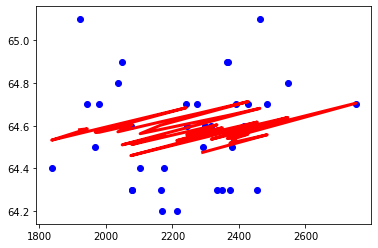

In [15]:
y_pred = lin_mod.predict(X)
plt.scatter(X['calories'],y,color='blue')
plt.plot(X['calories'], y_pred, color='Red', linewidth=3)


In [16]:
mergedf = print (pd.merge(weight, macros, on='date'))

         date  weight  weight trend  month  day  calories  carbs  fat  \
0  2020-11-14    65.1     65.108765     11   14      1921    202   65   
1  2020-11-15    64.7     65.052180     11   15      1944    239   48   
2  2020-11-17    64.4     64.889854     11   17      1837    221   41   
3  2020-11-19    64.7     64.842730     11   19      2241    251   65   
4  2020-11-20    64.5     64.796160     11   20      1968    233   54   
5  2020-11-21    64.7     64.783740     11   21      1979    229   51   
6  2020-11-22    64.3     64.717350     11   22      2078    223   61   
7  2020-11-25    64.8     64.698100     11   25      2036    245   51   
8  2020-11-26    64.2     64.631020     11   26      2170    168   38   
9  2020-11-27    64.7     64.640396     11   27      2274    241   55   
10 2020-11-28    64.7     64.648056     11   28      2428    249   68   
11 2020-11-29    64.3     64.601070     11   29      2165    246   49   
12 2020-12-02    64.4     64.530980     12    2    

In [17]:

weight.head(5)

,date,weight,weight trend,month,day
0,2020-11-01,65.3,65.300000,11,1
1,2020-11-02,65.4,65.313200,11,2
2,2020-11-03,65.1,65.284930,11,3
3,2020-11-04,65.1,65.260025,11,4
4,2020-11-05,65.2,65.252120,11,5


In [18]:
macros.head(5)

,date,calories,carbs,fat,protein,sodium,sugar
0,2020-11-14,1921,202,65,133,1422,53
1,2020-11-15,1944,239,48,149,755,94
2,2020-11-16,1960,253,41,146,886,63
3,2020-11-17,1837,221,41,147,2486,50
4,2020-11-18,2038,251,50,157,1071,57
